In [ ]:
import pandas as pd
import string
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Correct the paths if needed
# Load the files with AI-generated texts (notebooks 3, 4 and 5)
df_social = pd.read_csv('data/original/ai/ai_social.csv')
df_news = pd.read_csv('data/original/ai/ai_news.csv')
df_poems = pd.read_csv('data/original/ai/ai_poems.csv')

# Load the file with human data (notebook 2)
df_human = pd.read_csv('data/original/human_final.csv')

In [ ]:
df_human.sample()

,texts,source,word_counts,genre,class
138,"Mongun-ool Mongush Меня в ВК нету не видел, а...",fb,26,social,0


In [ ]:
df_social.sample()

,texts,source,word_counts,genre,class
304,"На фото слева - старый мост, которым пользовал...",chatgpt-4o-latest,36,social,1


In [ ]:
df_news.sample()

,texts,source,word_counts,genre,class
350,В Челябинской области произошло обрушение крыш...,chatgpt-4o-latest,252,news,1


In [ ]:
df_poems.sample()

,texts,source,word_counts,genre,class
415,"Просторы Руси \n\nНе в мир святых, но в землю...",chatgpt-4o-latest,97,poems,1


In [ ]:
# Concatenating all dataframes into one
df_final = pd.concat([df_social, df_news, df_poems, df_human], ignore_index=True)
df_final.head()

,texts,source,word_counts,genre,class
0,"> Снова в новостях: ""свои интересы защищаем"". ...",chatgpt-4o-latest,34,social,1
1,Да кто вообще верит в эти сказки про «светлое ...,chatgpt-4o-latest,38,social,1
2,"Господа, думайте прежде, чем спорить про полит...",chatgpt-4o-latest,36,social,1
3,"Ну вот, а говорили, что отзывов не будет. Оказ...",chatgpt-4o-latest,25,social,1
4,"Россия всегда будет впереди! Мы – нация, спосо...",chatgpt-4o-latest,38,social,1


In [ ]:
len(df_final)

3000

In [ ]:
df_final['class'].value_counts()

,count
class,
1,1500
0,1500


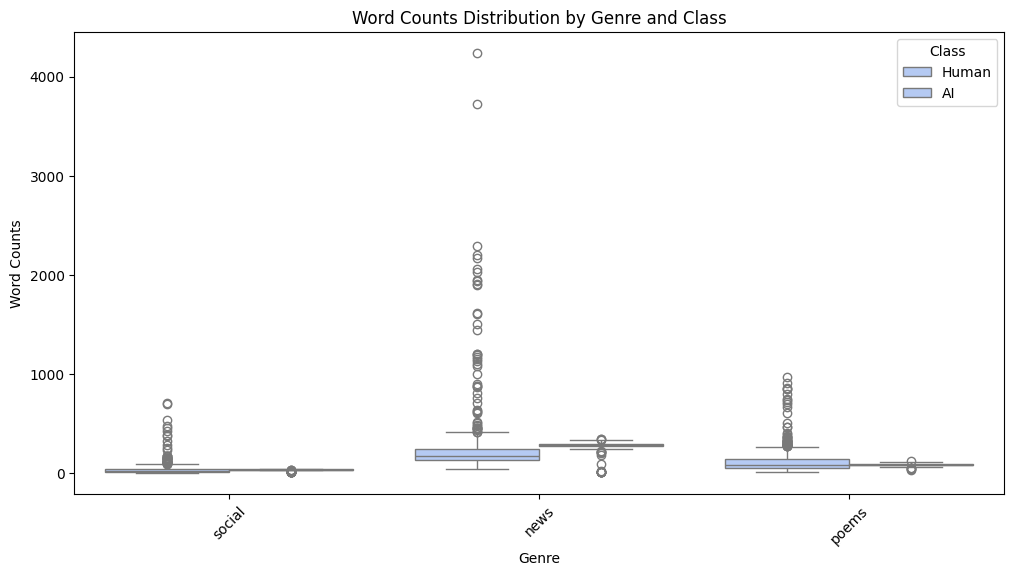

In [ ]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=df_final, x="genre", y="word_counts", hue="class", palette="coolwarm")

plt.xlabel("Genre")
plt.ylabel("Word Counts")
plt.title("Word Counts Distribution by Genre and Class")
plt.xticks(rotation=45)
plt.legend(title="Class", labels=["Human", "AI"])
plt.show()

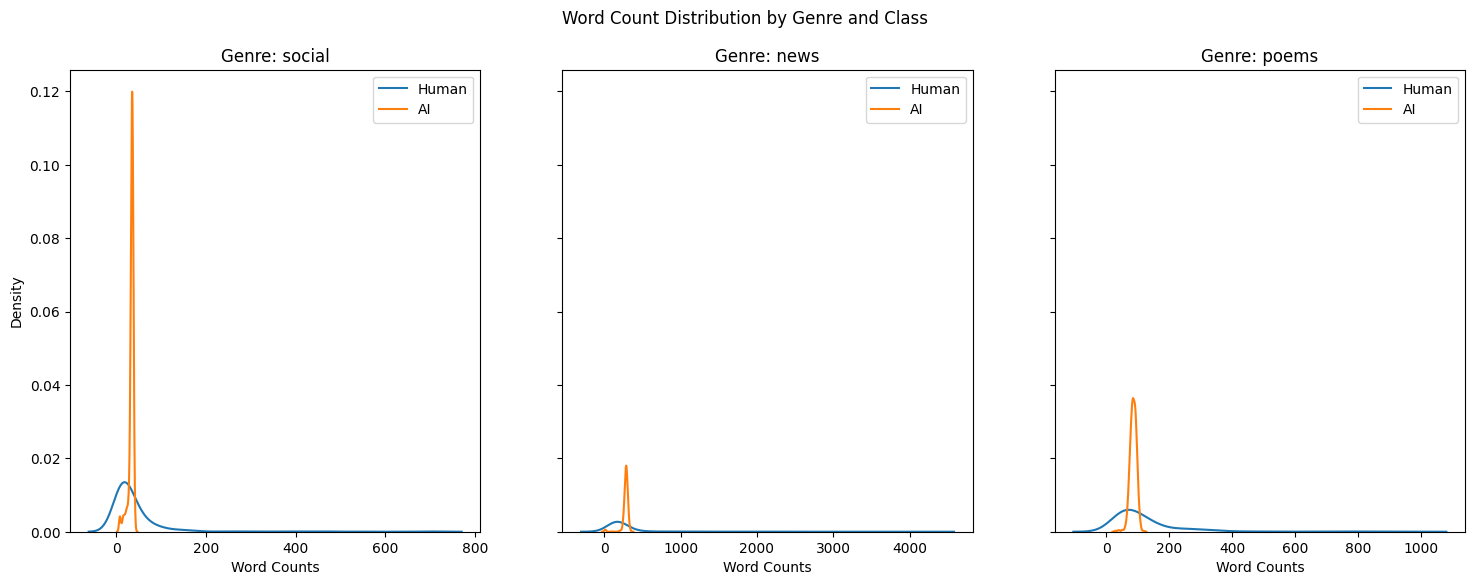

In [ ]:
genres = df_final["genre"].unique()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for each genre
for i, genre in enumerate(genres[:3]):
    ax = axes[i]

    for cls in [0, 1]:  # 0 for Human, 1 for AI
        subset = df_final[(df_final["genre"] == genre) & (df_final["class"] == cls)]
        sns.kdeplot(subset["word_counts"], ax=ax, label=f"{'Human' if cls == 0 else 'AI'}", fill=False)

    ax.set_title(f"Genre: {genre}")
    ax.set_xlabel("Word Counts")
    ax.legend()

axes[0].set_ylabel("Density")
plt.suptitle("Word Count Distribution by Genre and Class")
plt.show()

Creating train and test splits and addressing the length distribution issue.

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df_final, test_size=0.2, stratify=df_final['genre'], random_state=42)

In [ ]:
train_df.describe()

,word_counts,class
count,2400.000000,2400.000000
mean,139.771250,0.498750
std,203.454421,0.500103
min,1.000000,0.000000
25%,36.000000,0.000000
50%,86.000000,0.000000
75%,206.250000,1.000000
max,4238.000000,1.000000


In [ ]:
df_final.describe()

,word_counts,class
count,3000.000000,3000.000000
mean,139.874333,0.500000
std,201.577018,0.500083
min,1.000000,0.000000
25%,36.000000,0.000000
50%,86.000000,0.500000
75%,206.250000,1.000000
max,4238.000000,1.000000


In [ ]:
test_df.describe()

,word_counts,class
count,600.000000,600.000000
mean,140.286667,0.505000
std,194.050200,0.500392
min,4.000000,0.000000
25%,36.000000,0.000000
50%,87.000000,1.000000
75%,200.000000,1.000000
max,2165.000000,1.000000


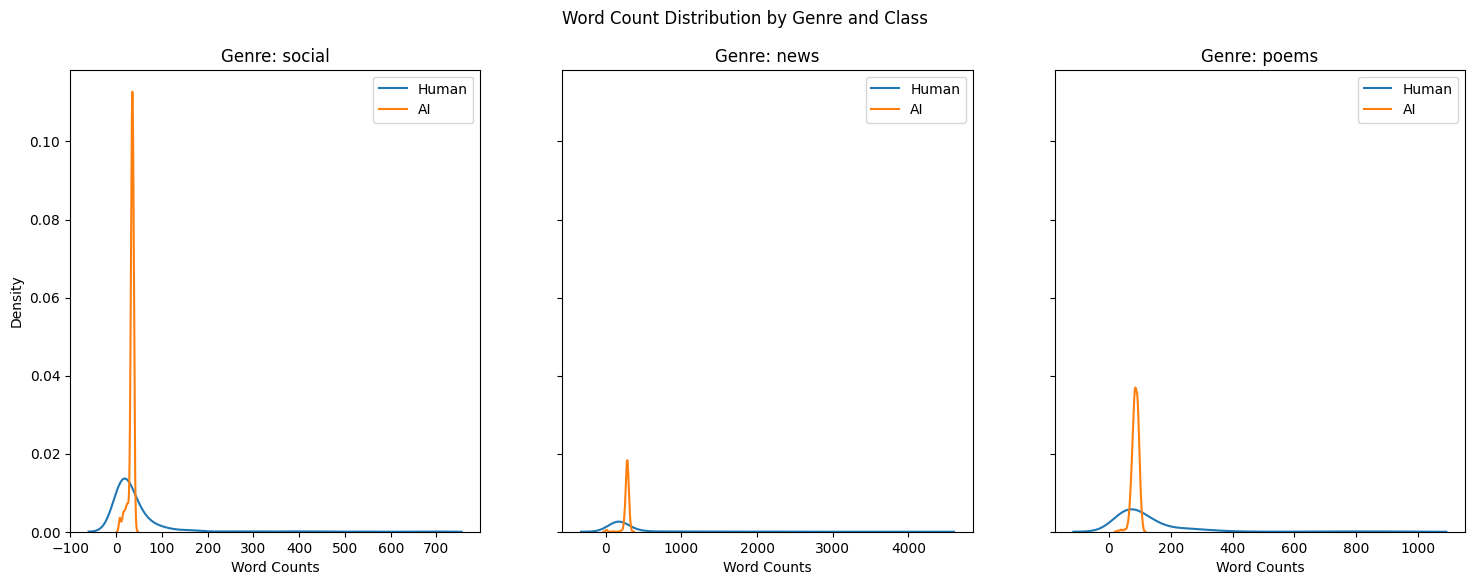

In [ ]:
genres = train_df["genre"].unique()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for each genre
for i, genre in enumerate(genres[:3]):
    ax = axes[i]

    for cls in [0, 1]:  # 0 for Human, 1 for AI
        subset = train_df[(train_df["genre"] == genre) & (train_df["class"] == cls)]
        sns.kdeplot(subset["word_counts"], ax=ax, label=f"{'Human' if cls == 0 else 'AI'}", fill=False)

    ax.set_title(f"Genre: {genre}")
    ax.set_xlabel("Word Counts")
    ax.legend()

axes[0].set_ylabel("Density")
plt.suptitle("Word Count Distribution by Genre and Class")
plt.show()

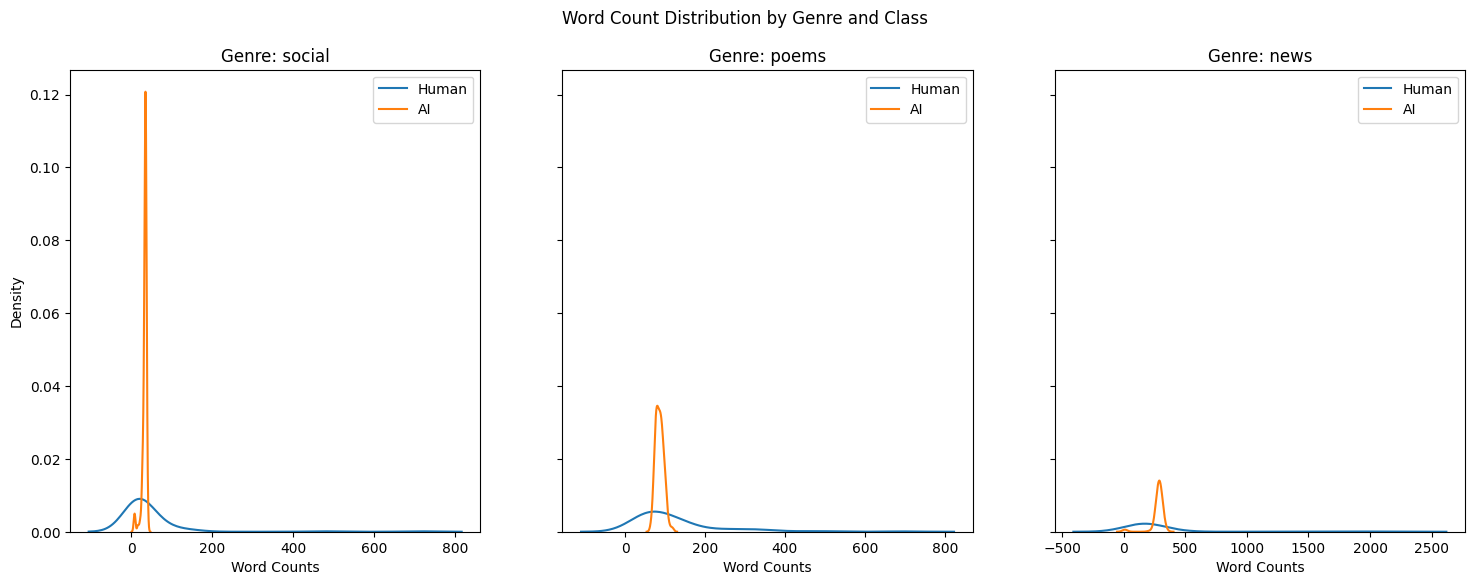

In [ ]:
genres = test_df["genre"].unique()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for each genre
for i, genre in enumerate(genres[:3]):
    ax = axes[i]

    for cls in [0, 1]:  # 0 for Human, 1 for AI
        subset = test_df[(test_df["genre"] == genre) & (test_df["class"] == cls)]
        sns.kdeplot(subset["word_counts"], ax=ax, label=f"{'Human' if cls == 0 else 'AI'}", fill=False)

    ax.set_title(f"Genre: {genre}")
    ax.set_xlabel("Word Counts")
    ax.legend()

axes[0].set_ylabel("Density")
plt.suptitle("Word Count Distribution by Genre and Class")
plt.show()

In [ ]:
test_df['class'].value_counts()

,count
class,
1,303
0,297


In [ ]:
test_df['genre'].value_counts()

,count
genre,
social,200
poems,200
news,200


In [ ]:
# Save the test split to set it aside
test_df.to_csv("data/test_split.csv", index=False)

In [ ]:
train_df['class'].value_counts()

,count
class,
0,1203
1,1197


In [ ]:
train_df['genre'].value_counts()

,count
genre,
social,800
news,800
poems,800


In [ ]:
train_df[train_df["class"] == 0]["genre"].value_counts()

,count
genre,
social,408
news,401
poems,394


In [ ]:
train_df[train_df["class"] == 1]["genre"].value_counts()

,count
genre,
poems,406
news,399
social,392


In [ ]:
print(train_df.groupby("class")["word_counts"].describe())

        count        mean         std  min   25%   50%    75%     max
class                                                                
0      1203.0  146.600998  266.297131  1.0  32.0  85.0  169.0  4238.0
1      1197.0  132.907268  108.007791  6.0  37.0  86.0  271.0   339.0


Since class 1 has a min of 6 words and a max of 339 words, we should:

Remove very short samples (e.g., word_counts < 6)
Remove very long samples (e.g., word_counts > 339)

In [ ]:
min_length = 6   # Minimum word count
max_length = 339 # Maximum word count

# Filter the dataset based on these limits
filtered_train_df = train_df[(train_df["word_counts"] >= min_length) & (train_df["word_counts"] <= max_length)]

In [ ]:
filtered_train_df['class'].value_counts()

,count
class,
1,1197
0,1117


In [ ]:
class_0_df = filtered_train_df[filtered_train_df["class"] == 0].reset_index(drop=True)
class_1_df = filtered_train_df[filtered_train_df["class"] == 1].reset_index(drop=True)

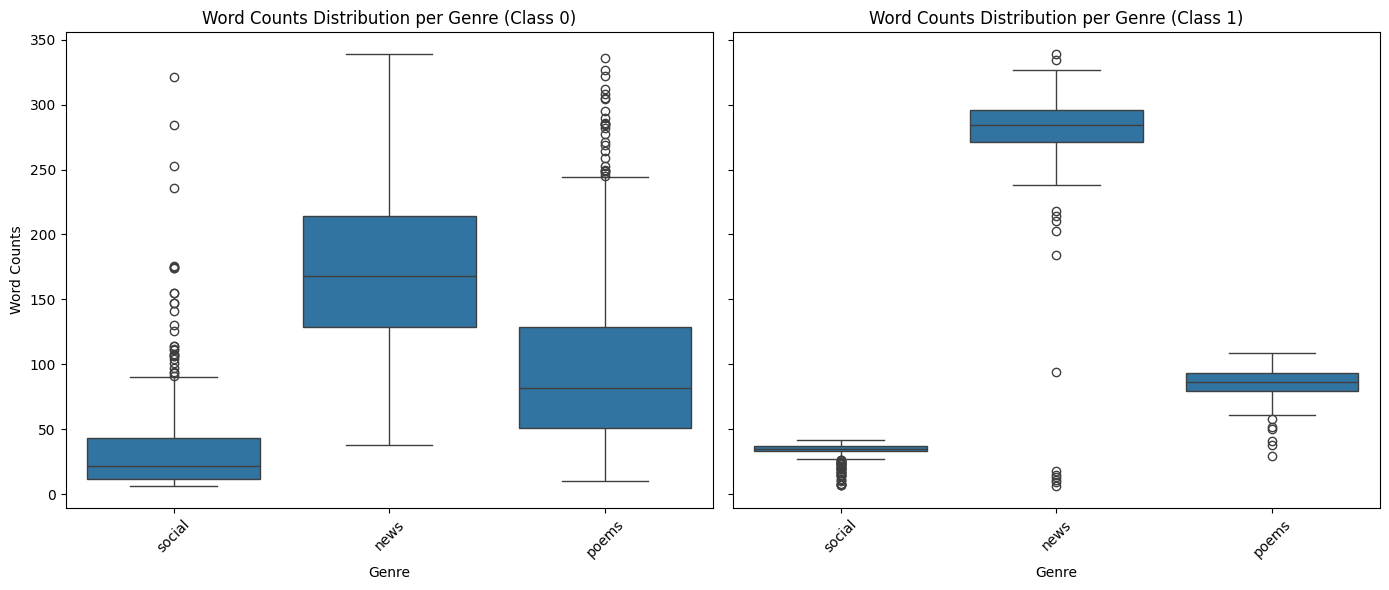

In [ ]:
# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for Class 0
sns.boxplot(x="genre", y="word_counts", data=class_0_df, ax=axes[0])
axes[0].set_title("Word Counts Distribution per Genre (Class 0)")
axes[0].set_xlabel("Genre")
axes[0].set_ylabel("Word Counts")
axes[0].tick_params(axis='x', rotation=45)

# Plot for Class 1
sns.boxplot(x="genre", y="word_counts", data=class_1_df, ax=axes[1])
axes[1].set_title("Word Counts Distribution per Genre (Class 1)")
axes[1].set_xlabel("Genre")
axes[1].tick_params(axis='x', rotation=45)

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
class_0_social_df = class_0_df[class_0_df["genre"] == "social"].reset_index(drop=True)
class_0_news_df = class_0_df[class_0_df["genre"] == "news"].reset_index(drop=True)
class_0_poems_df = class_0_df[class_0_df["genre"] == "poems"].reset_index(drop=True)

In [ ]:
class_1_social_df = class_1_df[class_1_df["genre"] == "social"].reset_index(drop=True)
class_1_news_df = class_1_df[class_1_df["genre"] == "news"].reset_index(drop=True)
class_1_poems_df = class_1_df[class_1_df["genre"] == "poems"].reset_index(drop=True)

In [ ]:
print(len(class_0_social_df))
print(len(class_0_news_df))
print(len(class_0_poems_df))

388
353
376


## Let's start with Social Genre first and try to match the length distribution with the AI generated texts.

In [ ]:
class_0_social_df.describe()

,word_counts,class
count,388.000000,388.0
mean,35.283505,0.0
std,40.170014,0.0
min,6.000000,0.0
25%,12.000000,0.0
50%,22.000000,0.0
75%,43.250000,0.0
max,321.000000,0.0


In [ ]:
# In this genre AI texts have minimum 7 and maximum 42 words. We need to remove the outliers for the human class.
# Most texts are 37 words long. We will add more texts of this length to substitute the ones we removed in the previous steps.
class_1_social_df.describe()

,word_counts,class
count,392.000000,392.0
mean,33.436224,1.0
std,6.154117,0.0
min,7.000000,1.0
25%,33.000000,1.0
50%,35.000000,1.0
75%,37.000000,1.0
max,42.000000,1.0


In [ ]:
class_0_social_df = class_0_social_df[class_0_social_df["word_counts"].between(7, 42)]

In [ ]:
# There are way more short texts in human class than in AI class
print((class_0_social_df["word_counts"] < 33).sum())

247


In [ ]:
print((class_1_social_df["word_counts"] < 33).sum())

85


In [ ]:
class_0_social_df = class_0_social_df.drop(class_0_social_df[class_0_social_df["word_counts"] < 33].sample(n=162, random_state=42).index)
print((class_0_social_df["word_counts"] < 33).sum())


85


In [ ]:
# Original number of texts in the train split for this genre was 408
# We need to add 294 text with the length rage between 35-42 words to match AI texts.
len(class_0_social_df)

114

In [ ]:
# Load the file with extra human data (notebook 2)
# Correct the path if needed
social_human_extra = pd.read_csv("data/original/social_human_extra.csv")
social_human_extra.head()

,texts,source,word_counts,genre
0,"Кстати, как неожиданно КПРФ стало не все равно...",vk,14,social
1,"можно и по-другому сказать: ""убогая клоунада"" ...",vk,36,social
2,Вот он тонкий незаметный ход против России. Зю...,vk,23,social
3,просто в этом паблике раньше подобных постов н...,vk,21,social
4,Это не КПРФ - это цирк. Коммунизм - это совсем...,vk,12,social


In [ ]:
selected_df = social_human_extra[social_human_extra["word_counts"].between(32, 38)].sample(n=294, random_state=42)
#selected_df = social_human_extra[social_human_extra["word_counts"]==37].sample(n=132, random_state=42)

In [ ]:
selected_df['source'].value_counts()

,count
source,
vk,157
fb,80
pikabu,57


In [ ]:
final_social_df_0 = pd.concat([class_0_social_df, selected_df], ignore_index=True)

In [ ]:
final_social_df_0.describe()

,word_counts,class
count,408.000000,114.0
mean,31.046569,0.0
std,8.702017,0.0
min,7.000000,0.0
25%,32.000000,0.0
50%,34.000000,0.0
75%,36.000000,0.0
max,42.000000,0.0


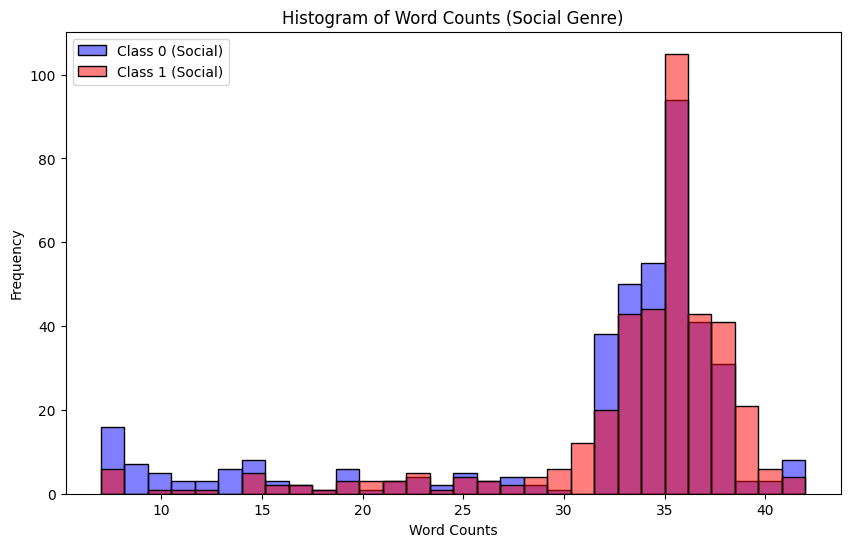

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
sns.histplot(final_social_df_0["word_counts"], bins=30, color="blue", alpha=0.5, label="Class 0 (Social)")
sns.histplot(class_1_social_df["word_counts"], bins=30, color="red", alpha=0.5, label="Class 1 (Social)")

plt.title("Histogram of Word Counts (Social Genre)")
plt.xlabel("Word Counts")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## News

We need 401 human text in this genre

In [ ]:
# Correct the path if needed
news_human_extra = pd.read_csv("data/original/news_human_extra.csv")
news_human_extra.head()

,title,texts,source,word_counts,genre
0,Загитова согласилась вести «Ледниковый период»,Загитова согласилась вести «Ледниковый период»...,lenta.ru,154,news
1,Объяснена опасность однообразного питания,Объяснена опасность однообразного питания\nРос...,lenta.ru,140,news
2,«Предохраняться? А зачем?»,«Предохраняться? А зачем?»\nВ 2019 году телека...,lenta.ru,2915,news
3,Ефремов систематически употреблял наркотики,Ефремов систематически употреблял наркотики\nА...,lenta.ru,139,news
4,"«Вы живете в мире, созданном блондинкой»","«Вы живете в мире, созданном блондинкой»\n27 а...",lenta.ru,1186,news


In [ ]:
class_1_news_df.describe()

,word_counts,class
count,399.000000,399.0
mean,278.676692,1.0
std,39.750772,0.0
min,6.000000,1.0
25%,271.500000,1.0
50%,284.000000,1.0
75%,296.000000,1.0
max,339.000000,1.0


In [ ]:
class_0_news_df.describe()

,word_counts,class
count,353.000000,353.0
mean,173.416431,0.0
std,64.015574,0.0
min,38.000000,0.0
25%,129.000000,0.0
50%,168.000000,0.0
75%,214.000000,0.0
max,339.000000,0.0


In [ ]:
# AI texts are all much longer than human texts
print((class_0_news_df["word_counts"] < 270).sum())
print((class_1_news_df["word_counts"] < 270).sum())

326
90


In [ ]:
class_0_news_df = class_0_news_df.drop(class_0_news_df[class_0_news_df["word_counts"] < 270].sample(n=236, random_state=42).index)
print((class_0_news_df["word_counts"] < 270).sum())

90


In [ ]:
# Original number of texts in the train split for this genre was 401
# We need to add 284 text with the length rage between 250-320 words to match AI texts.
len(class_0_news_df)

117

In [ ]:
selected_df_news = news_human_extra[news_human_extra["word_counts"].between(250, 320)].sample(n=284, random_state=42)
#selected_df = social_human_extra[social_human_extra["word_counts"]==37].sample(n=132, random_state=42)

In [ ]:
final_news_df_0 = pd.concat([class_0_news_df, selected_df_news], ignore_index=True)

In [ ]:
final_news_df_0['source'].value_counts()

,count
source,
ria.ru,300
lenta.ru,66
meduza.io,35


In [ ]:
final_news_df_0.describe()

,word_counts,class
count,401.000000,117.0
mean,257.800499,0.0
std,58.235986,0.0
min,46.000000,0.0
25%,252.000000,0.0
50%,274.000000,0.0
75%,295.000000,0.0
max,339.000000,0.0


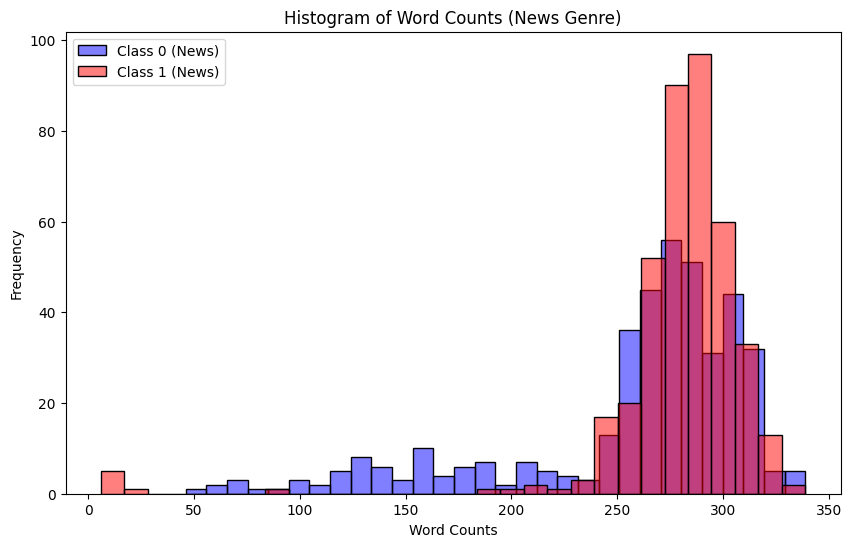

In [ ]:
# Plot
plt.figure(figsize=(10, 6))

sns.histplot(final_news_df_0["word_counts"], bins=30, color="blue", alpha=0.5, label="Class 0 (News)")
sns.histplot(class_1_news_df["word_counts"], bins=30, color="red", alpha=0.5, label="Class 1 (News)")

plt.title("Histogram of Word Counts (News Genre)")
plt.xlabel("Word Counts")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## Poems
Total number of human texts should be 394

In [ ]:
# Correct the file path if needed
poems_human_extra = pd.read_csv("data/original/poems_human_extra.csv")
poems_human_extra.head()

,title,texts,source,word_counts,genre
0,На серебряные шпоры…,На серебряные шпоры…\nНа серебряные шпоры\nЯ в...,Лермонтов Михаил Юрьевич,59,poems
1,Вид гор из степей Козлова,Вид гор из степей Козлова\nПилигрим\nАллах ли ...,Лермонтов Михаил Юрьевич,113,poems
2,"К (О, не скрывай! Ты плакала об нем…)","К (О, не скрывай! Ты плакала об нем…)\nО, не ...",Лермонтов Михаил Юрьевич,63,poems
3,"Жалобы турка (письмо к другу, иностранцу)","Жалобы турка (письмо к другу, иностранцу)\nТы ...",Лермонтов Михаил Юрьевич,98,poems
4,К кн. Л. Г-ой,К кн. Л. Г-ой\nКогда ты холодно внимаешь\nРасс...,Лермонтов Михаил Юрьевич,104,poems


In [ ]:
class_1_poems_df.describe()

,word_counts,class
count,406.000000,406.0
mean,85.692118,1.0
std,10.714536,0.0
min,29.000000,1.0
25%,79.250000,1.0
50%,86.000000,1.0
75%,93.000000,1.0
max,109.000000,1.0


In [ ]:
class_0_poems_df.describe()

,word_counts,class
count,376.000000,376.0
mean,101.805851,0.0
std,68.559946,0.0
min,10.000000,0.0
25%,51.000000,0.0
50%,81.500000,0.0
75%,128.500000,0.0
max,336.000000,0.0


In [ ]:
# First we will remove the outliers
class_0_poems_df = class_0_poems_df[class_0_poems_df["word_counts"].between(29, 109)]

In [ ]:
# 394 is the target number of texts
len(class_0_poems_df)

221

In [ ]:
class_0_poems_df.describe()

,word_counts,class
count,221.000000,221.0
mean,67.398190,0.0
std,21.016764,0.0
min,29.000000,0.0
25%,49.000000,0.0
50%,68.000000,0.0
75%,82.000000,0.0
max,108.000000,0.0


In [ ]:
# Let's pull 173 poems with the length range between 80-100
selected_df_poems = poems_human_extra[poems_human_extra["word_counts"].between(80, 100)].sample(n=173, random_state=42)

In [ ]:
final_poems_df_0 = pd.concat([class_0_poems_df, selected_df_poems], ignore_index=True)

In [ ]:
len(final_poems_df_0)

394

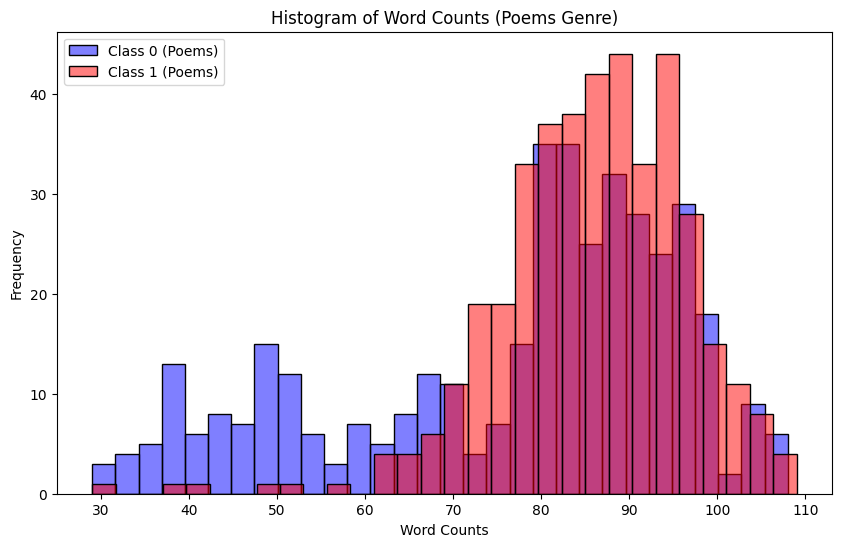

In [ ]:
# Plot
plt.figure(figsize=(10, 6))

sns.histplot(final_poems_df_0["word_counts"], bins=30, color="blue", alpha=0.5, label="Class 0 (Poems)")
sns.histplot(class_1_poems_df["word_counts"], bins=30, color="red", alpha=0.5, label="Class 1 (Poems)")

plt.title("Histogram of Word Counts (Poems Genre)")
plt.xlabel("Word Counts")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Final Train split

In [ ]:
final_poems_df_0.sample(5)

,texts,source,word_counts,genre,class,title
282,Греция\nМогучий Ахиллес громил твердыни Трои.\...,Есенин Сергей Александрович,83,poems,NaN,Греция
314,Песня (Успокой смятенный духъ)\nУспокой смятен...,Александр Петрович Сумароков,95,poems,NaN,Песня (Успокой смятенный духъ)
330,Давно мы встретились с тобою…\nДавно мы встрет...,Блок Александр Александрович,84,poems,NaN,Давно мы встретились с тобою…
144,В родимом граде скоропослушница снимает грех…\...,Аделаида Казимировна Герцык,105,poems,0.0,NaN
247,Сиротка\n(Редакция стихотворения «Сирота»)\nНе...,Алексей Васильевич Кольцов,85,poems,NaN,Сиротка


In [ ]:
print(len(final_poems_df_0))
print(len(final_social_df_0))
print(len(final_news_df_0))

394
408
401


In [ ]:
# Assign class = 0 to all rows in these dfs
for df in [final_poems_df_0, final_social_df_0, final_news_df_0]:
    df["class"] = 0

In [ ]:
# Put everything back together
train_df_final = pd.concat(
    [final_poems_df_0, final_news_df_0, final_social_df_0,
     class_1_poems_df, class_1_social_df, class_1_news_df],
    ignore_index=True
)

In [ ]:
train_df_final = train_df_final.drop(columns=["title"])

In [ ]:
train_df_final['class'].value_counts()

,count
class,
0,1203
1,1197


In [ ]:
# Save to file
train_df_final.to_csv("data/train_split.csv", index=False)